# Sales Analysis

## Importing Necessary Libraries

In [1]:
import pandas as pd
import glob
import os
import numpy
import matplotlib.pyplot as plt



## Merge all data in single CSV

In [2]:
df = pd.read_csv("Sales_Data\Sales_April_2019.csv")
df.head()
file_names = [file for file in os.listdir('./Sales_data')]
all_data = pd.DataFrame()
for file in file_names:
    df = pd.read_csv("./Sales_Data/" + file)
    all_data = pd.concat([all_data,df])

# Saving our merged file    
#all_data.to_csv('all_data.csv', index=False)

In [3]:
#all_data.head()

### What was the best month for sales? How much was earned that month?

### Adding month columns

In [4]:
all_data['Month'] = all_data['Order Date'].str[0:2]

# dropping all rows in month containing NaN values
all_data = all_data.dropna(axis = 0)

# dropping all rows in month containg non-number values
all_data = all_data[all_data.Month.isin(['Or']) == False]

#converting all Month values to integer type
all_data['Month'] = all_data['Month'].astype('int')
#all_data.head()

In [5]:
# Making a Sales column by multiplying Quantity and Price and coverting to int type
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Sales'] = all_data['Quantity Ordered'].astype('int')*all_data['Price Each'].astype('float')
#all_data.head()

In [6]:
# Summing up all sales value in the given month
sales_figure = all_data.groupby('Month').sum(numeric_only=True)
sales_figure=sales_figure.reset_index()
#sales_figure.max()

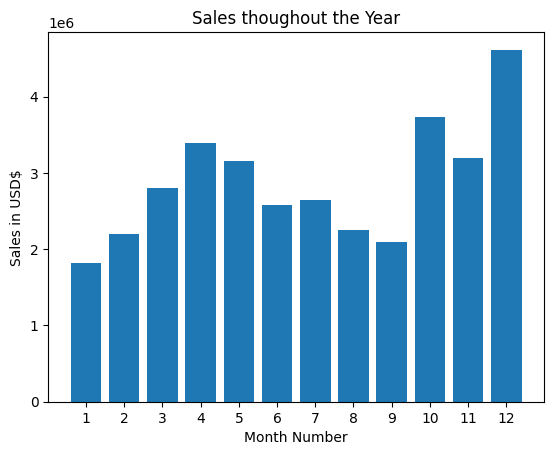

In [7]:
months = range(1,13)
plt.bar(months,sales_figure['Sales'])
plt.title('Sales thoughout the Year')
plt.xlabel('Month Number')
plt.ylabel('Sales in USD$')
plt.xticks(months)
plt.show()

##### As we can observe December has maximum sales
##### This could be the fact that December has Christmas and people love to gift

### Which city has highest number of sales?


In [8]:
# Making a column with city zip codes
all_data['Zip Code'] = all_data['Purchase Address'].str[-5:]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Zip Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,90001


In [9]:
# Adding up sales in particular city with zip codes
City_sales = all_data.groupby('Zip Code').sum(numeric_only=True)
City_sales.reset_index(inplace=True)

Text(0, 0.5, 'Number of sales')

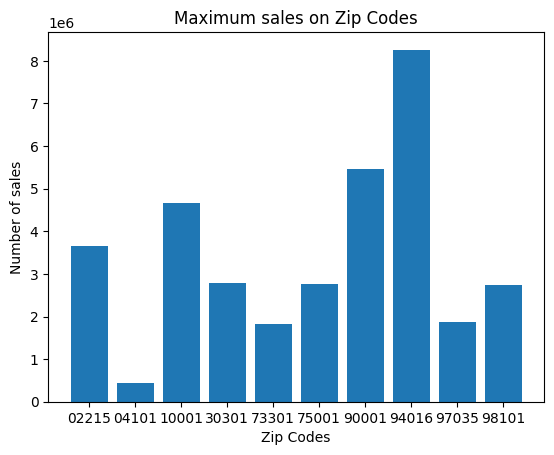

In [10]:
# Visualising the sales
l = []
s = []
plt.bar(City_sales['Zip Code'],City_sales['Sales'])
plt.title('Maximum sales on Zip Codes')
plt.xlabel('Zip Codes')
plt.ylabel('Number of sales')


### Now using City Names


In [11]:
all_data['City Name'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#all_data.head()

In [12]:
#Adding all sales figures according to City Names
City_data = all_data.groupby('City Name').sum(numeric_only=True)
City_data.reset_index(inplace = True)
#City_data

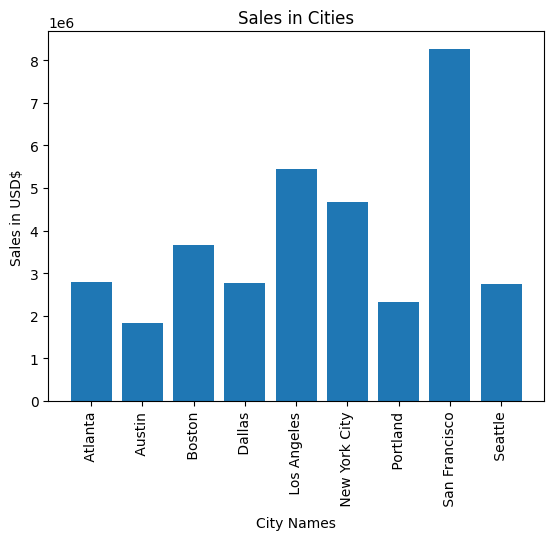

In [13]:
# Making bar graph to visualise
plt.bar(City_data['City Name'],City_data['Sales'])
plt.xticks(City_data['City Name'],rotation = 'vertical')
plt.xlabel('City Names')
plt.ylabel('Sales in USD$')
plt.title("Sales in Cities")
plt.show()

### What time should the business do advertisements to maximize the likehood of customer's buying product?


In [14]:
#all_data.head()

In [15]:
# Formatiing the date time in column Order Date
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
#all_data.head()

In [16]:
# Making a Hour Column and Minute Column
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['count'] = 1
#all_data.head()

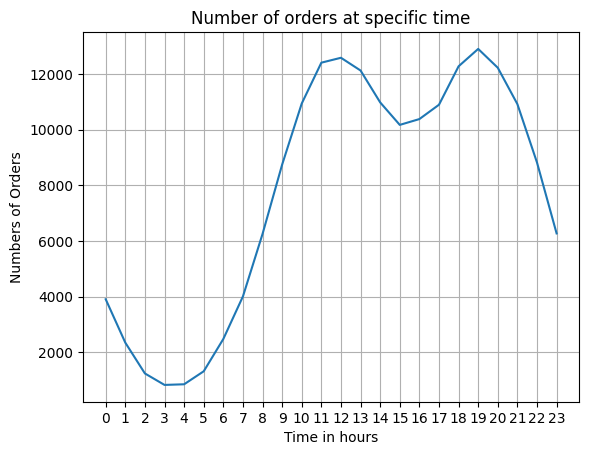

In [17]:
# Counting number of orders in specific hour
count = all_data.groupby('Hours').sum(numeric_only=True)
count.reset_index(inplace=True)
# Visualizing the data of count per hour
plt.plot(count['Hours'],count['count'])
plt.xlabel('Time in hours')
plt.ylabel('Numbers of Orders')
plt.title('Number of orders at specific time')
plt.xticks(count['Hours'])
plt.grid()
plt.show()

#### So as per my recomendation to do advertisement is around 11am to 8pm

### What products are often most sold together?


In [18]:
# To answer to this Question we need to check common orderID of the products and then we can say which products are sold together.
#all_data.head()

In [19]:
# Mreging all rows with same order id
New_data = all_data.groupby('Order ID',as_index = False).agg({'Order ID':'first','Product':','.join})
#df.groupby('Hobbies', as_index=False).agg({'Hobbies' : 'first', 'Name' : ' '.join})
New_data['Count'] = 1
#New_data

In [20]:
#finding the number of products sold together
count = New_data.groupby('Product').sum(numeric_only=True)
count.sort_values(by=['Count'], ascending = False)
count.reset_index(inplace = True)
count = count.sort_values(by=['Count'], ascending = False)

In [21]:
#Finding top selling products
top_selling_products = count[0:10]
#top_selling_products

Text(0.5, 1.0, 'Top Selling Products')

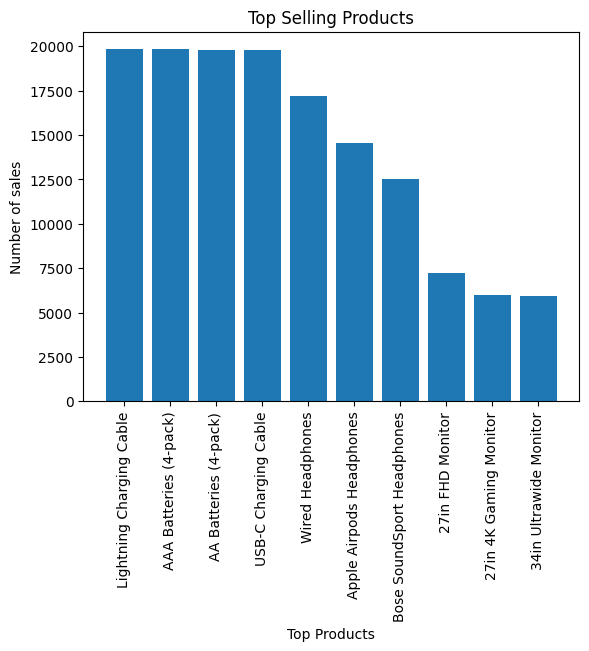

In [22]:
plt.bar(top_selling_products['Product'],top_selling_products['Count'])
plt.xticks(top_selling_products['Product'],rotation = 'vertical')
plt.xlabel('Top Products')
plt.ylabel('Number of sales')
plt.title('Top Selling Products')

#### Top selling Products
These top selling product conatins lightning charging cable, AAA & AA batteries set of 4 and USB type C cable.

In [23]:
#count

In [24]:
# Getting the list of products that are purchased together
#df = df[df['City'].str.contains('ew')]
count2 = count[count['Product'].str.contains(',')]
count2 = count2.sort_values(by = 'Count', ascending = False)
count2 = count2[0:10]
#count2

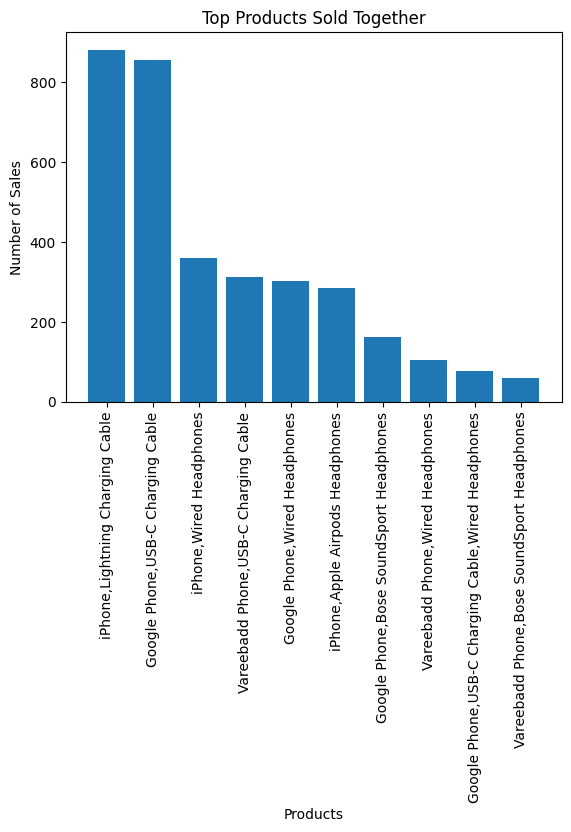

In [25]:
#Visualizing the data
plt.bar(count2['Product'],count2['Count'])
plt.title('Top Products Sold Together')
plt.xlabel('Products')
plt.ylabel('Number of Sales')
plt.xticks(count2['Product'],rotation = 'vertical')
plt.show()

#### To Products sold together list
Iphone + Lightning cable,
Google Phone + USB-C Cable,
Iphone + Wired Headphones,